In [1]:
##Linear algebra and optimization notebook
 
import tensorflow as tf
import numpy as np 

In [2]:
# Create constants that produces a 2x1 vectors 

v0 = tf.constant([1., 1],shape=[2,1])
v1 = tf.constant([1., -1],shape=[2,1])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.



In [3]:
dotproduct = tf.matmul(v0,v1) #Will this work ?


ValueError: Dimensions must be equal, but are 1 and 2 for 'MatMul' (op: 'MatMul') with input shapes: [2,1], [2,1].

In [4]:
v1.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [5]:
dotproduct = tf.matmul(tf.transpose(v0),v1)
#ok. But nothing happened. 

In [6]:
sess = tf.Session()
print sess.run(dotproduct)

[[ 0.]]


# Ok the vectors v0 and v1 have 0 dot product, i.e. they are orthogonal. 

In [7]:
dotproduct_flat = tf.reshape( dotproduct,[-1])

In [8]:
sess.run(dotproduct_flat)

array([ 0.], dtype=float32)

In [9]:
sess.close()  #clean up. 

## Approximating and projecting vectors 

In [10]:
z = tf.constant([2., 1],shape=[2,1])

In [ ]:
## approximate the vector z as good as possible by c* v0. 
## Min || z- c* v0 ||
## recall v0=[1,1] and z= [2,1]

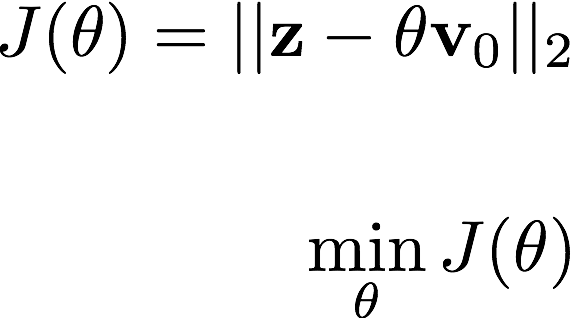

In [11]:
from IPython.display import Image
Image(filename = "objective.png", width=300, height=100)

In [ ]:
#ok lets guess a value, say theta = 1.1 

In [84]:
theta= tf.constant([1.],shape=[1,1])  #recall z=[2,1] and v0=[1,1]

In [13]:
err_vec= tf.subtract(z, tf.multiply(theta,v0))

In [14]:
sess=tf.Session()
print sess.run(err_vec)

[[ 1.]
 [ 0.]]


In [15]:
loss = tf.reduce_mean((z - tf.multiply( theta, v0) ) ** 2)


In [16]:
print sess.run(loss)

0.5


In [129]:
theta= tf.Variable (tf.constant([1.1]))  #recall z=[2,1] and v0=[1,1]

loss = tf.reduce_mean((z - tf.multiply( theta, v0) ) ** 2)

#opt = tf.train.AdamOptimizer(learning_rate=0.3)
opt = tf.train.GradientDescentOptimizer(learning_rate=1.1)
update_op = opt.minimize(loss, var_list=[theta])

init_op = tf.global_variables_initializer()  #init_op must be defined after everything else ! 

sess.run(init_op)


In [137]:
sess.run(update_op)  #Run one iteration 

In [138]:
sess.run(theta)

array([ 0.67055964], dtype=float32)

In [139]:
sess.run(loss)   #Lets see our loss for this theta value at this iteration

0.93797135

In [140]:
#We can also get the gradient 
gradient = tf.gradients(loss, [theta])
print sess.run(gradient)

[array([-1.65888071], dtype=float32)]


In [141]:
sess.close() #clean up. 

In [142]:
from IPython.display import Image

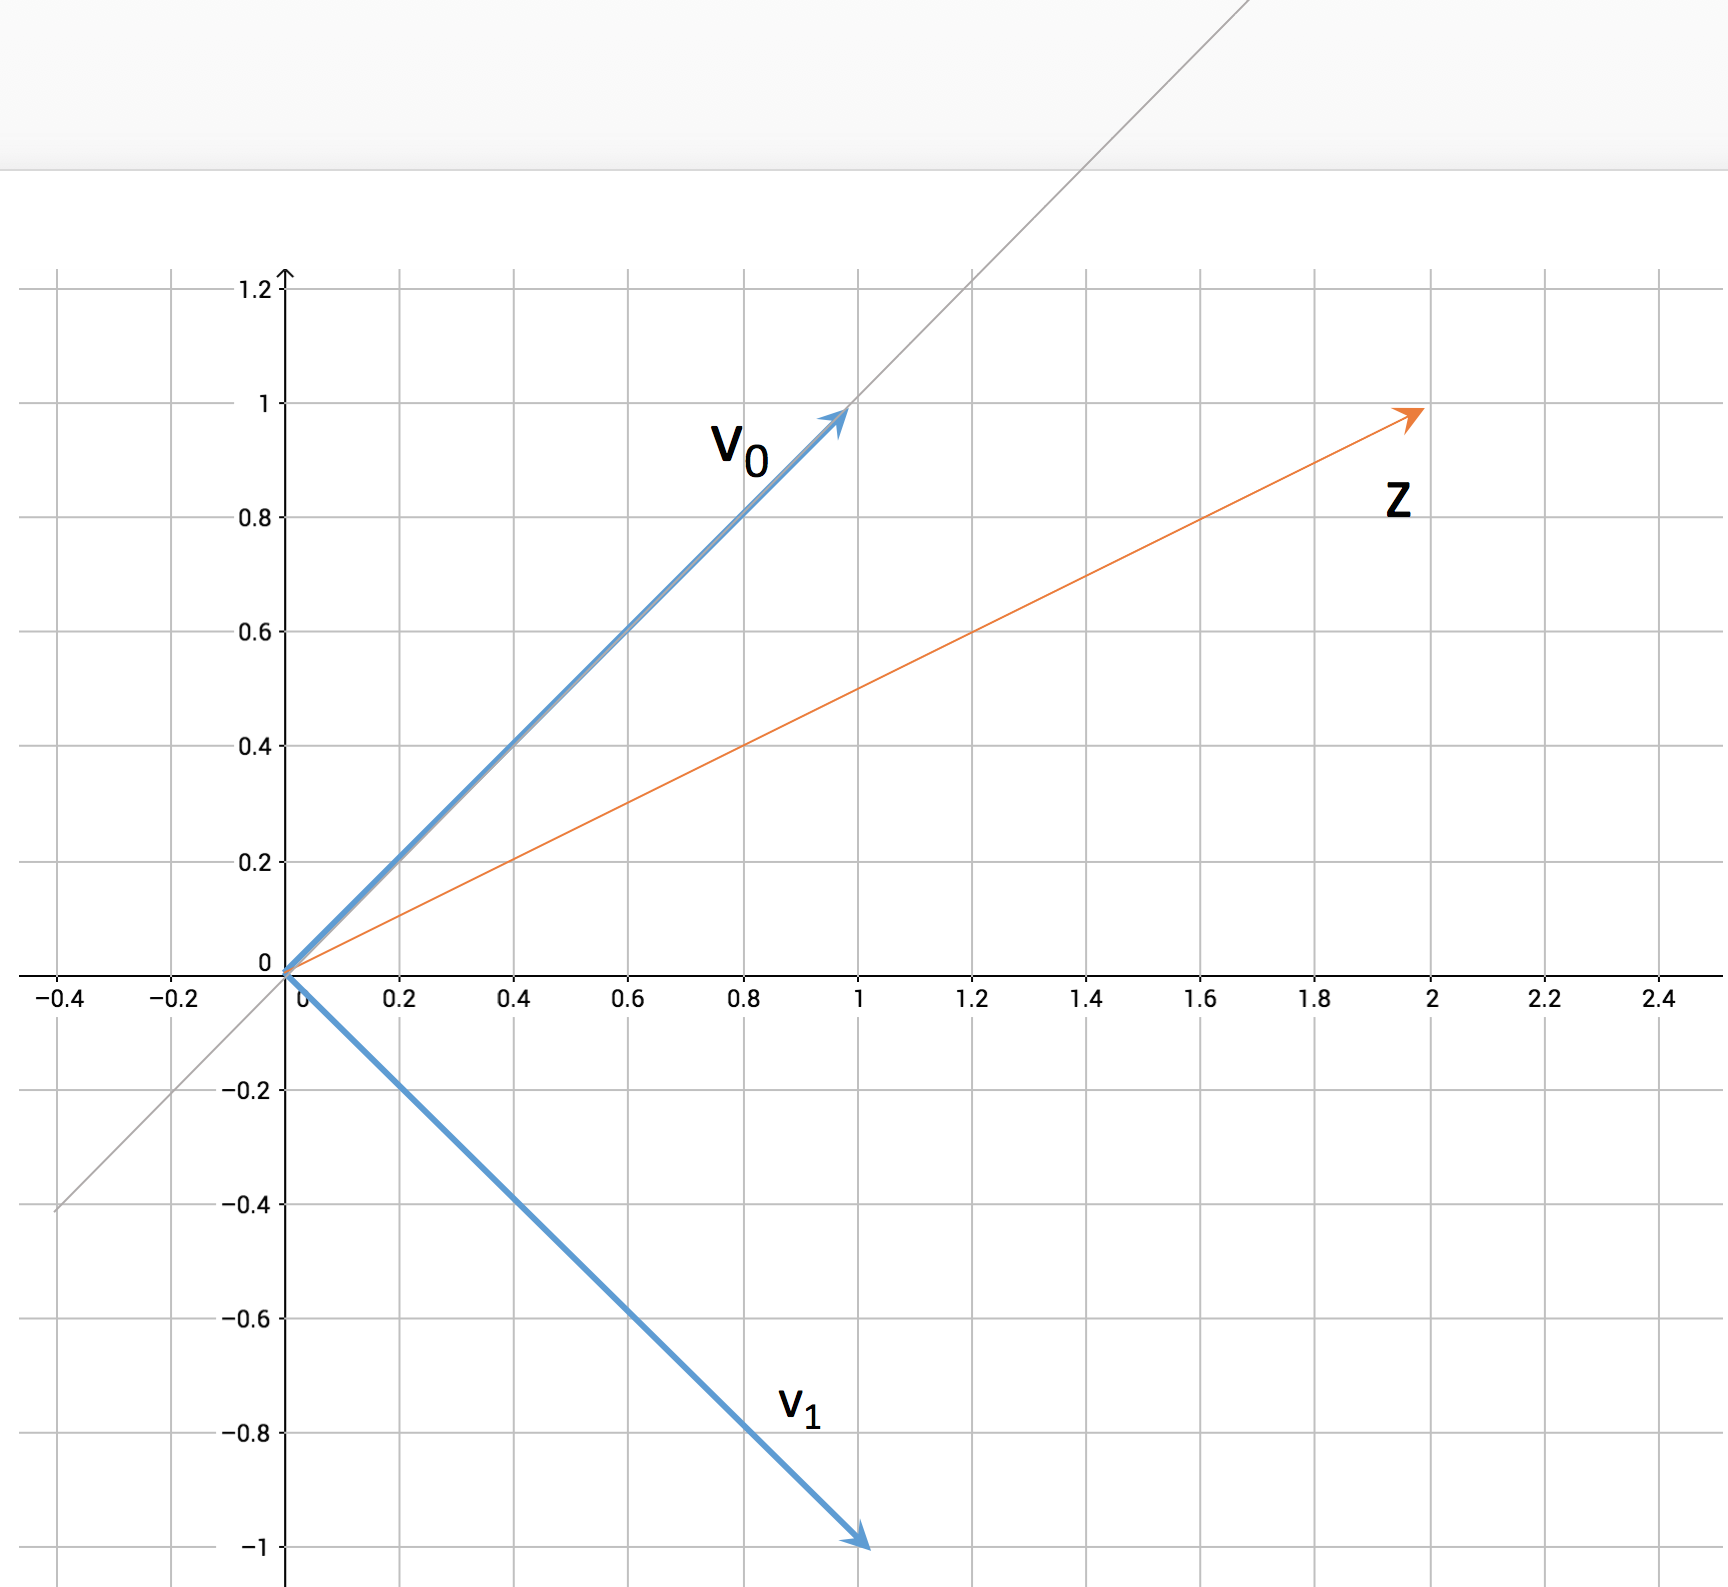

In [5]:
Image(filename = "vectors.png", width=500, height=100)

## In this case we don't need to search over the optimal t. There is a closed-form formula for finding it. It is the projection: normalize v0 to have unit length and then take inner product. 

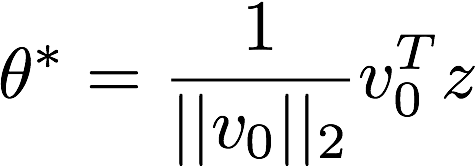

In [6]:
Image(filename = "opt_theta.png", width=300, height=100)

In [143]:
dot_v0_z = tf.matmul(tf.transpose(v0),z)


In [144]:
sess=tf.Session() 
sess.run(dot_v0_z)

array([[ 3.]], dtype=float32)

In [145]:
dot_normalized_v0_z = tf.divide ( tf.matmul(tf.transpose(v0),z),  tf.matmul(tf.transpose(v0),v0))


In [146]:
sess.run(dot_normalized_v0_z)  #And this is the optimal value. 

array([[ 1.5]], dtype=float32)